In [2]:
import pandas as pd
import numpy as np 
from gpxutils import parse_gpx 
import matplotlib.pyplot as plt
%matplotlib inline

# Analysis of Cycling Data

We are provided with four files containing recordings of cycling activities that include GPS location data as
well as some measurements related to cycling performace like heart rate and power.  The goal is to perform
some exploration and analysis of this data. 

The data represents four races.  Two are time trials where the rider rides alone on a set course.  Two are 
road races where the rider rides with a peleton.  All were held on the same course but the road races include
two laps where the time trials include just one. 

Questions to explore with the data:
* What is the overall distance travelled for each of the rides? What are the average speeds etc.  Provide a summary for each ride.
* Compare the range of speeds for each ride, are time trials faster than road races? 
* Compare the speeds achieved in the two time trials (three years apart).  As well as looking at the averages, can you see where in the ride one or the other is faster.  
* From the elevation_gain field you can see whether the rider is _climbing_ , _descending_ or on the _flat_.   Use this to calculate the average speeds in those three cases (climbing, flat or descending).  Note that _flat_ might not be zero elevation_gain but might allow for slight climbs and falls.  

For time varying data like this it is often useful to _smooth_ the data using eg. a [rolling mean](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.rolling_mean.html).  You might want to experiment with smoothing in some of your analysis (not required but may be of interest).

## Description of Fields

* _index_ is a datetime showing the time that the observation was made (I wasn't riding at night, this is converted to UTC)
* __latitude, longitude, elevation__ from the GPS, the position of the rider at each timepoint, elevation in m
* __temperature__ the current ambient temperature in degrees celcius
* __power__ the power being generated by the rider in Watts
* __cadence__ the rotational speed of the pedals in revolutions per minute
* __hr__ heart rate in beats per minute
* __elevation_gain__ the change in elevation in m between two observations
* __distance__ distance travelled between observations in km
* __speed__ speed measured in km/h

You are provided with code in [gpxutils.py](gpxutils.py) to read the GPX XML format files that are exported by cycling computers and applications.  The sample files were exported from [Strava](https://strava.com/) and represent four races by Steve Cassidy.


In [3]:
# read the four data files
rr_2016 = parse_gpx('files/Calga_RR_2016.gpx')
tt_2016 = parse_gpx('files/Calga_TT_2016.gpx')
rr_2019 = parse_gpx('files/Calga_RR_2019.gpx')
tt_2019 = parse_gpx('files/Calga_TT_2019.gpx')

In [4]:
rr_2016.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-05-14 04:02:41+00:00,-33.415561,151.222303,208.6,29.0,0.0,40.0,102.0,0.000000,0.0,0.000000,NaN
2016-05-14 04:02:42+00:00,-33.415534,151.222289,208.6,29.0,0.0,40.0,102.0,0.003271,0.0,11.777020,1.0
2016-05-14 04:02:46+00:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0
2016-05-14 04:02:49+00:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0
2016-05-14 04:02:51+00:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0


In [5]:
# Examine the data: check number of rows and number of columns
rr_2016.shape

(2822, 11)

In [14]:
tt_2016.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-07-02 23:05:30+00:00,-33.415971,151.222016,111.8,12.0,0.0,58.0,108.0,0.000000,0.0,0.000000,NaN
2016-07-02 23:05:32+00:00,-33.416026,151.222008,111.8,12.0,0.0,58.0,105.0,0.006161,0.0,11.089134,2.0
2016-07-02 23:05:38+00:00,-33.416034,151.222023,111.8,12.0,0.0,58.0,105.0,0.001652,0.0,0.991282,6.0
2016-07-02 23:06:01+00:00,-33.416041,151.222038,111.8,13.0,0.0,58.0,100.0,0.001595,0.0,0.249655,23.0
2016-07-02 23:06:02+00:00,-33.416048,151.222053,111.8,13.0,0.0,65.0,101.0,0.001595,0.0,5.742071,1.0


In [6]:
# Examine the data: check number of rows and number of columns
tt_2016.shape

(1541, 11)

In [16]:
rr_2019.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2019-06-22 22:33:45+00:00,-33.416592,151.222853,215.0,0.0,0.0,58.0,71.0,0.000000,0.0,0.000000,NaN
2019-06-22 22:33:46+00:00,-33.416629,151.222877,215.0,0.0,147.0,58.0,71.0,0.004679,0.0,16.842677,1.0
2019-06-22 22:33:47+00:00,-33.416677,151.222905,214.8,0.0,97.0,60.0,71.0,0.005936,-0.2,21.371074,1.0
2019-06-22 22:33:48+00:00,-33.416730,151.222937,214.8,0.0,74.0,61.0,71.0,0.006599,0.0,23.757913,1.0
2019-06-22 22:33:49+00:00,-33.416783,151.222972,214.8,0.0,136.0,62.0,71.0,0.006729,0.0,24.225566,1.0


In [17]:
# Examine the data: check number of rows and number of columns
rr_2019.shape

(5503, 11)

In [18]:
tt_2019.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2019-06-01 22:54:55+00:00,-33.415798,151.222060,219.4,13.0,0.0,0.0,88.0,0.000000,0.0,0.000000,NaN
2019-06-01 22:54:56+00:00,-33.415782,151.222051,219.4,13.0,0.0,0.0,88.0,0.001965,0.0,7.075656,1.0
2019-06-01 22:54:57+00:00,-33.415767,151.222041,219.4,13.0,0.0,0.0,88.0,0.001909,0.0,6.871582,1.0
2019-06-01 22:54:58+00:00,-33.415751,151.222032,219.4,13.0,0.0,0.0,89.0,0.001965,0.0,7.075656,1.0
2019-06-01 22:54:59+00:00,-33.415735,151.222022,219.4,13.0,0.0,0.0,89.0,0.002007,0.0,7.223997,1.0


In [1]:
# Examine the data: check number of rows and number of columns
tt_2019.shape

NameError: name 'tt_2019' is not defined

**DATA CLEANING**

This section will look for missing values in the four datasets. I will eliminate these missing values if I feel they will influence the overall conclusion of the data.

2016: Road Races

In [48]:
# Print full summary
rr_2016.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2822 entries, 2016-05-14 04:02:41+00:00 to 2016-05-14 05:29:21+00:00
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   latitude        2822 non-null   float64 
 1   longitude       2822 non-null   float64 
 2   elevation       2822 non-null   float64 
 3   temperature     2822 non-null   float64 
 4   power           2822 non-null   float64 
 5   cadence         2822 non-null   float64 
 6   hr              2822 non-null   float64 
 7   distance        2822 non-null   float64 
 8   elevation_gain  2822 non-null   float64 
 9   speed           2822 non-null   float64 
 10  timedelta       2821 non-null   float64 
 11  motion type     2822 non-null   category
 12  development     2822 non-null   float64 
dtypes: category(1), float64(12)
memory usage: 289.5 KB


In [49]:
# Return the number of missing values in the data set
rr_2016.isnull().sum()

latitude          0
longitude         0
elevation         0
temperature       0
power             0
cadence           0
hr                0
distance          0
elevation_gain    0
speed             0
timedelta         1
motion type       0
development       0
dtype: int64

2016: Time Trials

In [50]:
# Print full summary
tt_2016.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1541 entries, 2016-07-02 23:05:30+00:00 to 2016-07-02 23:51:17+00:00
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   latitude             1541 non-null   float64 
 1   longitude            1541 non-null   float64 
 2   elevation            1541 non-null   float64 
 3   temperature          1541 non-null   float64 
 4   power                1541 non-null   float64 
 5   cadence              1541 non-null   float64 
 6   hr                   1541 non-null   float64 
 7   distance             1541 non-null   float64 
 8   elevation_gain       1541 non-null   float64 
 9   speed                1541 non-null   float64 
 10  timedelta            1540 non-null   float64 
 11  Distance from Start  1541 non-null   float64 
 12  motion type          1540 non-null   category
 13  development          1541 non-null   float64 
dtypes: category(1), float64(

In [51]:
# Return the number of missing values in the data set
tt_2016.isnull().sum()

latitude               0
longitude              0
elevation              0
temperature            0
power                  0
cadence                0
hr                     0
distance               0
elevation_gain         0
speed                  0
timedelta              1
Distance from Start    0
motion type            1
development            0
dtype: int64

2019: Road Races

In [53]:
# Print full summary
rr_2019.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5503 entries, 2019-06-22 22:33:45+00:00 to 2019-06-23 00:05:27+00:00
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   latitude        5503 non-null   float64 
 1   longitude       5503 non-null   float64 
 2   elevation       5503 non-null   float64 
 3   temperature     5503 non-null   float64 
 4   power           5503 non-null   float64 
 5   cadence         5503 non-null   float64 
 6   hr              5503 non-null   float64 
 7   distance        5503 non-null   float64 
 8   elevation_gain  5503 non-null   float64 
 9   speed           5503 non-null   float64 
 10  timedelta       5502 non-null   float64 
 11  motion type     5503 non-null   category
 12  development     5503 non-null   float64 
dtypes: category(1), float64(12)
memory usage: 564.4 KB


In [52]:
# Return the number of missing values in the data set
rr_2019.isnull().sum()

latitude          0
longitude         0
elevation         0
temperature       0
power             0
cadence           0
hr                0
distance          0
elevation_gain    0
speed             0
timedelta         1
motion type       0
development       0
dtype: int64

2019: Time Trials

In [54]:
# Print full summary
tt_2019.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2655 entries, 2019-06-01 22:54:55+00:00 to 2019-06-01 23:39:09+00:00
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   latitude             2655 non-null   float64 
 1   longitude            2655 non-null   float64 
 2   elevation            2655 non-null   float64 
 3   temperature          2655 non-null   float64 
 4   power                2655 non-null   float64 
 5   cadence              2655 non-null   float64 
 6   hr                   2655 non-null   float64 
 7   distance             2655 non-null   float64 
 8   elevation_gain       2655 non-null   float64 
 9   speed                2655 non-null   float64 
 10  timedelta            2654 non-null   float64 
 11  Distance from Start  2655 non-null   float64 
 12  motion type          2655 non-null   category
 13  development          2655 non-null   float64 
dtypes: category(1), float64(

In [55]:
# Return the number of missing values in the data set
tt_2016.isnull().sum()

latitude               0
longitude              0
elevation              0
temperature            0
power                  0
cadence                0
hr                     0
distance               0
elevation_gain         0
speed                  0
timedelta              1
Distance from Start    0
motion type            1
development            0
dtype: int64

According to the four data sets, there is just 1 missing value in 1 or 2 columns of each dataset. There is no need to be concerned about removing these missing values from the dataset because it will not have a significant impact on the overall conclusion of the data.

**EXPLORATORY DATA ANALYSIS**

Since we have validated the data for missing values and determined that there is no need to remove them, we can now address the following questions.

**1. What is the overall distance travelled for each of the rides? What are the average speeds etc. Provide a summary for each ride.**

In [20]:
# Function to summarise data
def summary(ride):
    total_distance = ride.distance.sum()
    total_time = ride.timedelta.sum()
    average_speed = total_distance / ((total_time)/3600)
    print (('Total Distance Covered  :  {:.2f} km').format(total_distance))
    print (('Total time taken  :  {:.2f} seconds').format(total_time))
    print (('Average Speed :  {:.2f} km/hr').format(average_speed))
    print (('Total Power Generated :  {:2} watts ').format(ride.power.sum()))
    return ride.drop(columns =['latitude','longitude','timedelta']).describe()

2016: Road Races

In [21]:
print ("Summary Data for Road Races 2016")
summary(rr_2016)

Summary Data for Road Races 2016
Total Distance Covered  :  49.05 km
Total time taken  :  5200.00 seconds
Average Speed :  33.96 km/hr
Total Power Generated :  0.0 watts 


,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed
count,2822.000000,2822.000000,2822.0,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000
mean,232.404465,25.280652,0.0,65.987952,158.394401,0.017381,-0.003756,34.933085
std,29.725934,1.348746,0.0,34.425881,11.304588,0.015695,0.458872,10.738677
min,176.000000,24.000000,0.0,0.000000,102.000000,0.000000,-1.600000,0.000000
25%,209.450000,24.000000,0.0,68.000000,151.000000,0.007894,-0.400000,26.656312
50%,226.100000,25.000000,0.0,79.000000,158.000000,0.011794,0.000000,33.307339
75%,258.200000,26.000000,0.0,87.000000,166.000000,0.016899,0.400000,42.871885
max,295.800000,30.000000,0.0,117.000000,205.000000,0.076283,1.200000,92.749036


2016: Time Trials

In [23]:
print ("Summary Data for Time Trials 2016")
summary(tt_2016)

Summary Data for Time Trials 2016
Total Distance Covered  :  24.80 km
Total time taken  :  2747.00 seconds
Average Speed :  32.50 km/hr
Total Power Generated :  0.0 watts 


,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed
count,1541.000000,1541.000000,1541.0,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000
mean,139.068657,10.953277,0.0,83.277093,170.939650,0.016095,-0.002466,33.529963
std,30.301132,0.657937,0.0,21.169978,23.392548,0.015897,0.515343,11.519681
min,85.000000,10.000000,0.0,0.000000,100.000000,0.000000,-7.400000,0.000000
25%,116.200000,11.000000,0.0,77.000000,157.000000,0.007622,-0.400000,25.068271
50%,134.000000,11.000000,0.0,86.000000,161.000000,0.010974,0.000000,32.840076
75%,165.400000,11.000000,0.0,96.000000,180.000000,0.015960,0.400000,41.470522
max,202.600000,13.000000,0.0,118.000000,251.000000,0.288175,2.400000,162.505764


2019: Road Races

In [24]:
print ("Summary Data for Road Races 2019")
summary(rr_2019)

Summary Data for Road Races 2019
Total Distance Covered  :  51.79 km
Total time taken  :  5502.00 seconds
Average Speed :  33.89 km/hr
Total Power Generated :  1175539.0 watts 


,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed
count,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000
mean,243.243576,5.997819,213.617845,70.004906,138.998546,0.009411,0.000254,33.879861
std,30.197981,0.806414,144.123686,29.869938,16.184123,0.002459,0.347322,8.853503
min,185.200000,0.000000,0.000000,0.000000,71.000000,0.000000,-2.000000,0.000000
25%,219.600000,5.000000,104.000000,66.000000,129.000000,0.007839,-0.200000,28.219962
50%,236.000000,6.000000,212.000000,81.000000,142.000000,0.009178,0.000000,33.041360
75%,269.600000,7.000000,308.000000,89.000000,152.000000,0.010733,0.200000,38.640026
max,310.400000,7.000000,785.000000,120.000000,170.000000,0.019547,1.000000,70.370469


2019: Time Trials

In [25]:
print ("Summary Data for Time Trials 2019")
summary(tt_2019)

Summary Data for Time Trials 2019
Total Distance Covered  :  24.38 km
Total time taken  :  2654.00 seconds
Average Speed :  33.07 km/hr
Total Power Generated :  683840.0 watts 


,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed
count,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000
mean,250.435104,10.194350,257.566855,89.979661,152.741243,0.009183,0.000377,33.057824
std,29.434104,0.833934,80.023555,17.543883,8.217632,0.002715,0.298628,9.773522
min,195.800000,9.000000,0.000000,0.000000,88.000000,0.000000,-1.600000,0.000000
25%,229.200000,10.000000,213.500000,88.000000,150.000000,0.007345,-0.200000,26.440757
50%,243.800000,10.000000,264.000000,94.000000,153.000000,0.009228,0.000000,33.220108
75%,276.200000,10.000000,308.000000,98.000000,158.000000,0.010913,0.200000,39.286242
max,312.200000,13.000000,522.000000,111.000000,166.000000,0.017584,0.600000,63.300734


**2. Compare the range of speeds for each ride, are time trials faster than road races?**

Road Races 

In [26]:
# Merge data from rr_2016 and rr_2019 into a single table.
print ("Range of Speeds for Road Races")
roadraces = pd.concat([rr_2016, rr_2019])
total_distance = roadraces.distance.sum()
total_time = roadraces.timedelta.sum()
average_speed = total_distance / ((total_time)/3600)
print (('Average Speed of road races :  {:.2f} km/hr').format(average_speed))
print (('Maximum speed of road races : {:.2f}').format(roadraces.speed.max()))
print (('mean speed of road races    : {:.2f}').format(roadraces.speed.mean()))

Range of Speeds for Road Races
Average Speed of road races :  33.92 km/hr
Maximum speed of road races : 92.75
mean speed of road races    : 34.24


Time Trials

In [27]:
# Merge data from rr_2016 and rr_2019 into a single table.
print ("Range of Speeds for Time Trials")
timetrials = pd.concat([tt_2016, tt_2019])
total_distance = timetrials.distance.sum()
total_time = timetrials.timedelta.sum()
average_speed = total_distance / ((total_time)/3600)
print (('Average Speed of time trials :  {:.2f} km/hr').format(average_speed))
print (('Maximum speed of time trials : {:.2f}').format(timetrials.speed.max()))
print (('mean speed of time trials    : {:.2f}').format(timetrials.speed.mean()))

Range of Speeds for Time Trials
Average Speed of time trials :  32.78 km/hr
Maximum speed of time trials : 162.51
mean speed of time trials    : 33.23


Time trials are not faster than road races. Despite the fact that time trials have a peak speed of 162.51 and road races have a peak speed of 92.75, road races are faster in terms of average and mean speeds.

**3. Compare the speeds achieved in the two time trials (three years apart). As well as looking at the averages, can you see where in the ride one or the other is faster.**

2016: Time Trials

Speeds achieved for time trials 2016
Time Trials Minimum Speed 2016 :0.000000 km/hr 
Time Trials Maximum Speed 2016 :162.505764 km/hr 
Time Trials mean Speed 2016 :33.529963 km/hr 
Time Trials Average Speed 2016 :32.504694 km/hr 
Distance from start to achieve maximum speed:  13.115879917309915


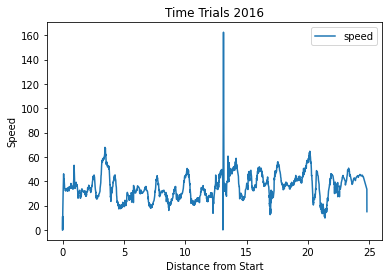

In [28]:
print ("Speeds achieved for time trials 2016")
total_distance = tt_2016.distance.sum()
total_time = tt_2016.timedelta.sum()
average_speed = total_distance / ((total_time)/3600)
print('Time Trials Minimum Speed 2016 :{:2f} km/hr '.format(tt_2016.speed.min()))
print('Time Trials Maximum Speed 2016 :{:2f} km/hr '.format(tt_2016.speed.max()))
print('Time Trials mean Speed 2016 :{:2f} km/hr '.format(tt_2016.speed.mean()))
print('Time Trials Average Speed 2016 :{:2f} km/hr '.format(average_speed))
tt_2016['Distance from Start']=tt_2016.distance.cumsum()
tt_2016.plot(x='Distance from Start', y='speed',title='Time Trials 2016', ylabel="Speed");
print('Distance from start to achieve maximum speed: ',tt_2016.iloc[tt_2016.speed.argmax()]['Distance from Start'])

2019: Time Trials

Speeds achieved for time trials 2019
Time Trials Minimum Speed 2019 :0.000000 km/hr  
Time Trials Maximum Speed 2019 :63.300734 km/hr 
Time Trials mean Speed 2019 :33.057824 km/hr 
Time Trials Average Speed 2019 :33.070280 km/hr 
Distance from start to achieve maximum speed:  3.444751664299418


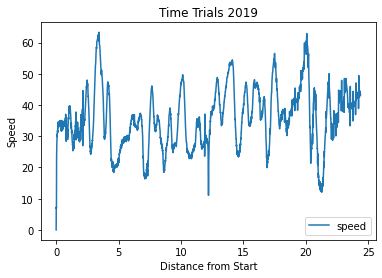

In [32]:
print ("Speeds achieved for time trials 2019")
total_distance = tt_2019.distance.sum()
total_time = tt_2019.timedelta.sum()
average_speed = total_distance / ((total_time)/3600)
print('Time Trials Minimum Speed 2019 :{:2f} km/hr  '.format(tt_2019.speed.min()))
print('Time Trials Maximum Speed 2019 :{:2f} km/hr '.format(tt_2019.speed.max()))
print('Time Trials mean Speed 2019 :{:2f} km/hr '.format(tt_2019.speed.mean()))
print('Time Trials Average Speed 2019 :{:2f} km/hr '.format(average_speed))
tt_2019['Distance from Start']=tt_2019.distance.cumsum()
tt_2019.plot(x='Distance from Start', y='speed',title='Time Trials 2019', ylabel="Speed");
print('Distance from start to achieve maximum speed: ',tt_2019.iloc[tt_2019.speed.argmax()]['Distance from Start'])

The noticeable difference between the two rides is around 13.11km from the start of the journey, when the 2016 ride has a maximum speed of 162 km/h and the 2019 ride has a maximum speed of less than 60km/h. However, we can conclude that the 2019 time trials are faster than the 2016 time trials over the duration of the journey based on the average speed of the two rides.

**4.  From the elevation_gain field you can see whether the rider is climbing , descending or on the flat. Use this to calculate the average speeds in those three cases (climbing, flat or descending). Note that flat might not be zero elevation_gain but might allow for slight climbs and falls.**

2016: Road Races

In [37]:
# Function to categorise elevation_gain field and compute average speed for all three categories
def elev_gain(data):
    # We set up thresholds for FLAT, CLIMBING OR DESCENDING
    # Above 0.01 = CLIMBING
    # BELOW -0.01 = DESCENDING
    data['motion type'] = pd.cut(x=data['elevation_gain'], bins=[-5, -.015, 0.015, 5], labels=['descending', 'flat', 'climbing'])
    print('Average speed for each type of motion: (km/hr)')
    total_distance = (data.groupby(['motion type'])['distance'].sum())
    total_time  = (data.groupby(['motion type'])['timedelta'].sum())
    average_speed = total_distance / ((total_time)/3600)
    return (average_speed)

In [38]:
print ('Road Race 2016')
elev_gain(rr_2016)

Road Race 2016
Average speed for each type of motion: (km/hr)


motion type
descending    45.110195
flat          33.672429
climbing      26.626384
dtype: float64

2016: Time Trials

In [39]:
print ('Time Trials 2016')
elev_gain(tt_2016)

Time Trials 2016
Average speed for each type of motion: (km/hr)


motion type
descending    43.667773
flat          33.073174
climbing      24.478272
dtype: float64

2019: Road Races

In [40]:
print ('Road Race 2019')
elev_gain(rr_2019)

Road Race 2019
Average speed for each type of motion: (km/hr)


motion type
descending    41.167089
flat          33.482058
climbing      28.815089
dtype: float64

2019: Time Trials

In [41]:
print ('Trial Trial 2019')
elev_gain(tt_2019)

Trial Trial 2019
Average speed for each type of motion: (km/hr)


motion type
descending    42.664764
flat          33.340725
climbing      26.025625
dtype: float64

## Challenge: Gear Usage

A modern race bike has up to 22 different gears with two chainrings on the front (attached to the pedals) and 10 or 11 at the back (attached to the wheel).   The ratio of the number of teeth on the front and rear cogs determines the distance travelled with one revolution of the pedals (often called __development__, measured in metres).  Low development is good for climbing hills while high development is for going fast downhill or in the final sprint. 

We have a measure of the number of rotations of the pedals per minute (__cadence__) and a measure of __speed__.  Using these two variables we should be able to derive a measure of __development__ which would effectivly tell us which gear the rider was using at the time.   Development will normally range between __2m__ and __10m__.  Due to errors in GPS and cadence measurements you will see many points outside this range and you should just discard them as outliers. 

Write code to calculate __development__ in _meters_ for each row in a ride.  Plot the result in a _histogram_ and compare the plots for the four rides.   Comment on what you observe in the histograms.





In [43]:
#Function to calculate development 
def development(data):
    data['development']=(data['speed'] *1000/60) / (data['cadence'] )
    data['development'].replace([np.inf, -np.inf], np.nan, inplace=True)
    data['development'].fillna(0,inplace=True)
    data['development'].clip(lower=0, upper=15,inplace=True)
    return data['development'].plot.hist();

2016: Road Races

<AxesSubplot:ylabel='Frequency'>

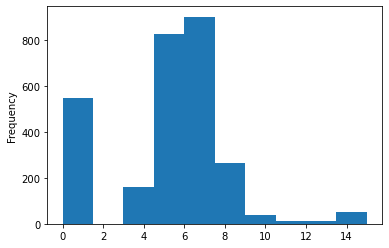

In [44]:
development(rr_2016) 

2016: Time Trials

<AxesSubplot:ylabel='Frequency'>

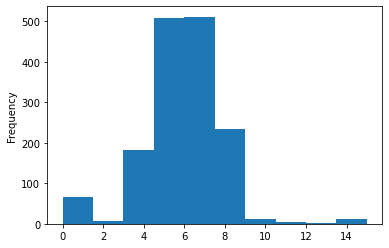

In [45]:
development(tt_2016)

2019: Road Races

<AxesSubplot:ylabel='Frequency'>

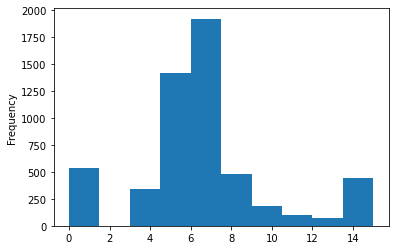

In [46]:
development(rr_2019)

2019: Time Trials

<AxesSubplot:ylabel='Frequency'>

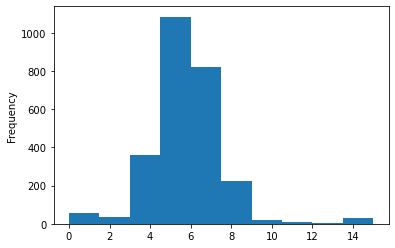

In [47]:
development(tt_2019)

The development values are normally spread between 2 and 10.